o 하루단위로 변환한 후 결측치 50%이상인 feature 제거하여 상관관계를 보도록 하자  
x 하루단위로 변환할때 시간대도 바꿔가면서 변환하자  
x 평균, max, min, 누적 모두 해보자  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
train = pd.read_csv('data/weather_v1.csv')
label = pd.read_csv('data/target_v1.csv')
area = pd.read_csv('data/lookupTable_area.csv')

notQC_col = [i for i in train.columns if 'QCFlag' not in i]
train = train[notQC_col]

/home/suna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [160]:
def dayDF_len(area_num):
    areaDF = train[train['area']==area_num]
    areaDF['date'] = pd.to_datetime(areaDF['datetime'], format='%Y-%m-%d', errors='raise').dt.date
    areaDF = areaDF.groupby(areaDF['date']).mean()
    return len(areaDF)

def dayDF(area_num):
    areaDF = train[train['area']==area_num]
    areaDF['date'] = pd.to_datetime(areaDF['datetime'], format='%Y-%m-%d', errors='raise').dt.date
    areaDF = areaDF.groupby(areaDF['date']).mean()
    return areaDF

In [143]:
for i in area['area']:
    print(dayDF_len(i)/730)
# 결측치가 많은 지역은 제거
train = train[train['area']!=893]
train = train[train['area']!=892]
train = train[train['area']!=891]

area = area.iloc[:-3]

/home/suna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1.0
1.0
1.0
1.0
1.0
1.0
0.9986301369863013
0.9986301369863013
1.0
0.9958904109589041
1.0
1.0
1.0
0.9958904109589041
1.0
0.989041095890411
0.9972602739726028
1.0
1.0
1.0
1.0
1.0
0.9767123287671233
1.0
1.0
0.989041095890411
0.9753424657534246
0.9794520547945206
0.9917808219178083
0.9821917808219178
0.9986301369863013
1.0
1.0
1.0
0.9945205479452055
0.9917808219178083
0.736986301369863
0.3095890410958904
0.2410958904109589


In [154]:
def area_corr(area_num):
    areaDF = train[train['area']==area_num]
    areaDF['date'] = pd.to_datetime(areaDF['datetime'], format='%Y-%m-%d', errors='raise').dt.date
    areaDF = areaDF.groupby(areaDF['date']).mean()
    msv_ration = areaDF.isna().sum()/len(areaDF)
    drop_x = ['area']
    for feature, ratio in zip(msv_ration.index,msv_ration):
        if ratio>=0.5:
            drop_x.append(feature)
            
    areaDF = areaDF.drop(drop_x,axis=1)
    

    label['date'] = pd.to_datetime(label['date'], format='%Y-%m-%d', errors='raise').dt.date
    label.index = label['date']
    condf = pd.concat([areaDF,label],axis=1)

    return condf.corr()

In [157]:
def corr_bar(area_num):
    plt.figure(figsize=(15, 3))
    plt.bar(np.arange(len(area_corr(area_num).index[:-4])), list(area_corr(area_num)['smp_max'])[:-4])
    plt.ylabel('smp_max')
    
    plt.show()  
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_corr(area_num).index[:-4])), list(area_corr(area_num)['smp_min'])[:-4])
    plt.ylabel('smp_min')
    
    plt.show()    
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_corr(area_num).index[:-4])), list(area_corr(area_num)['smp_mean'])[:-4])
    plt.ylabel('smp_mean')
    
    plt.show()    
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_corr(area_num).index[:-4])), list(area_corr(area_num)['supply'])[:-4])
    
    plt.xlabel('Feature')
    plt.ylabel('supply')
    plt.xticks(np.arange(len(area_corr(area_num).index[:-4])),area_corr(area_num).index,fontsize=15, rotation=90)
    plt.show()

제주 =================================================================================


/home/suna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


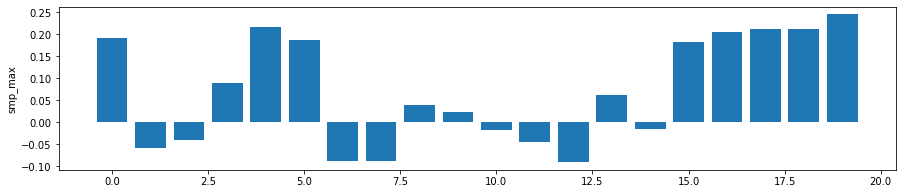

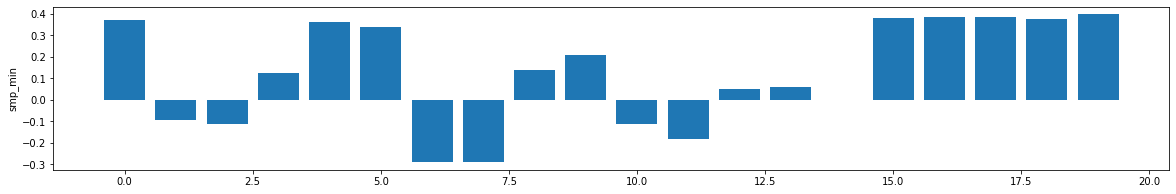

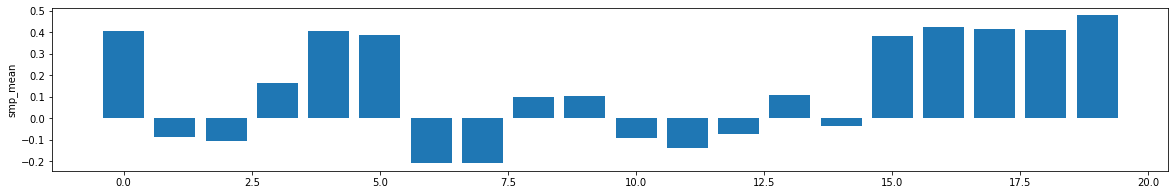

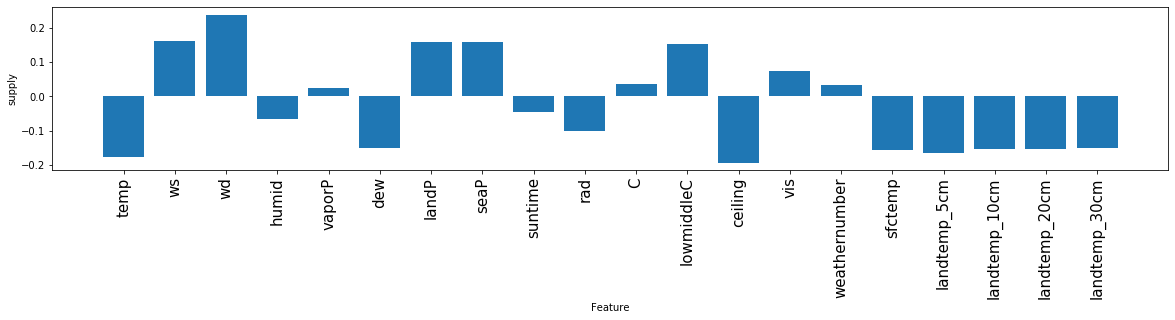

고산 =================================================================================


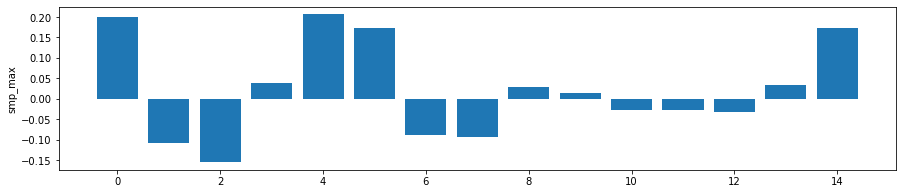

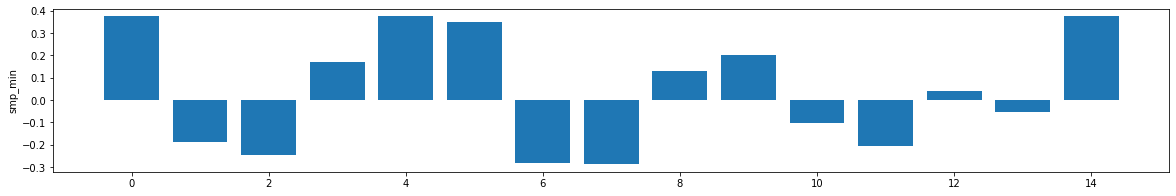

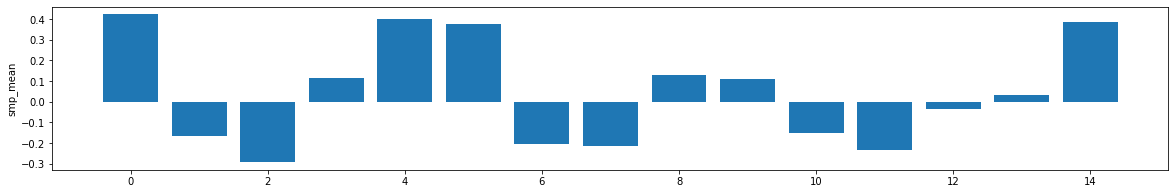

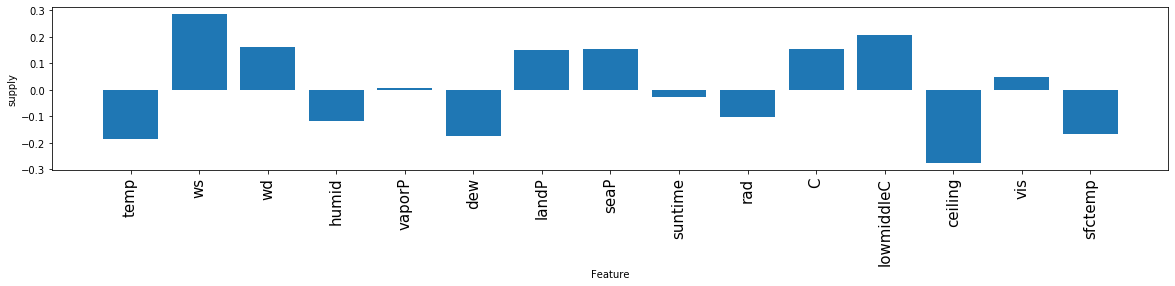

성산 =================================================================================


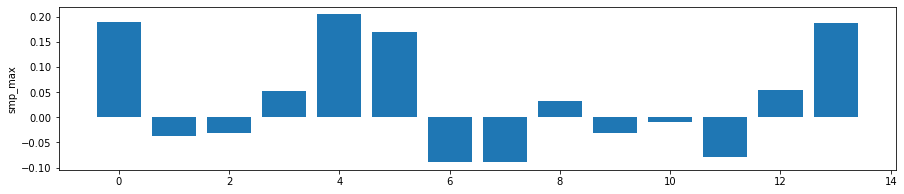

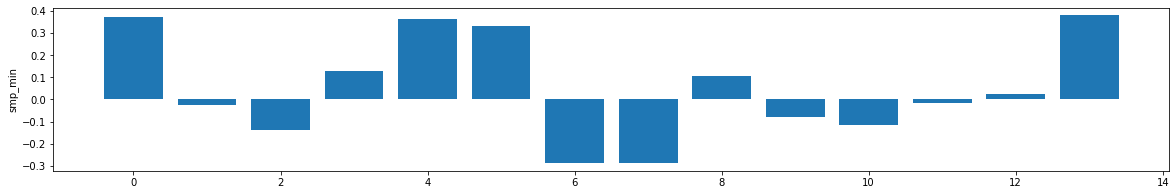

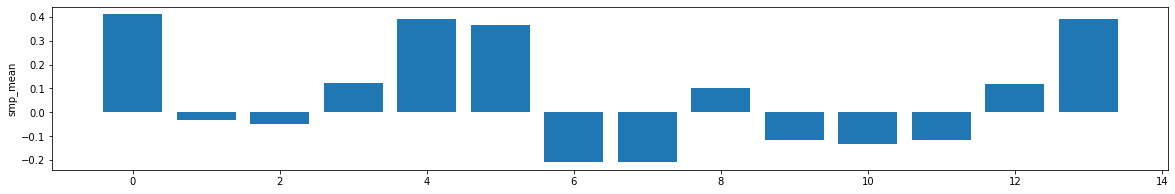

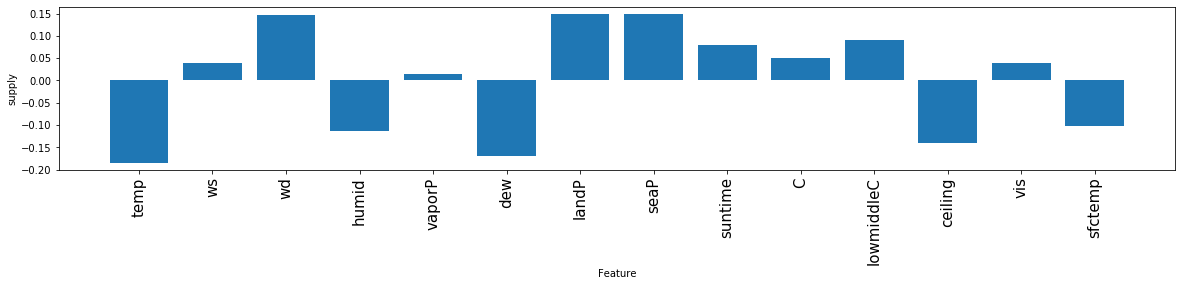

서귀포 =================================================================================


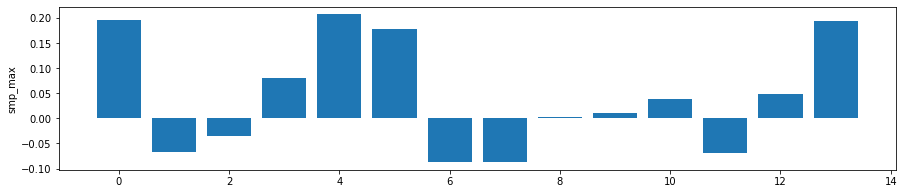

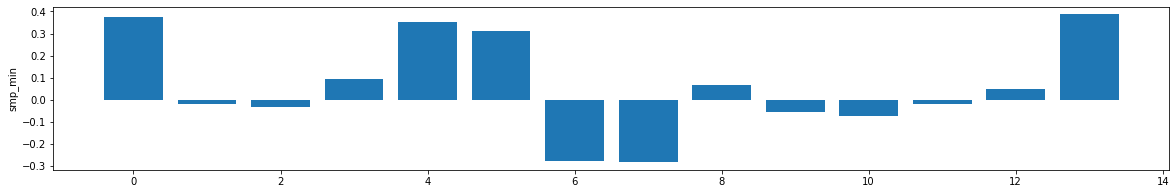

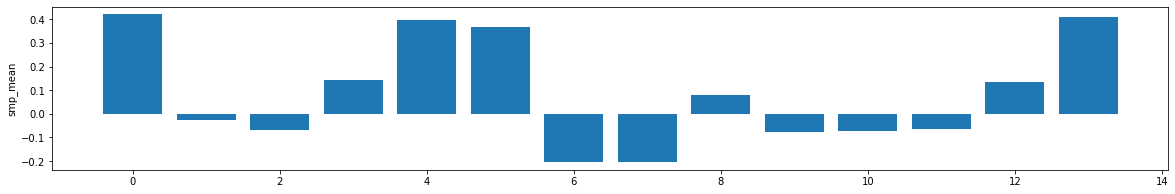

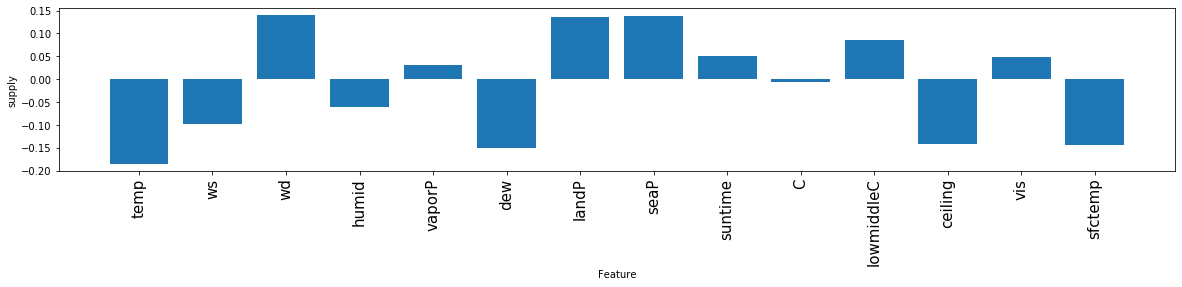

중문 =================================================================================


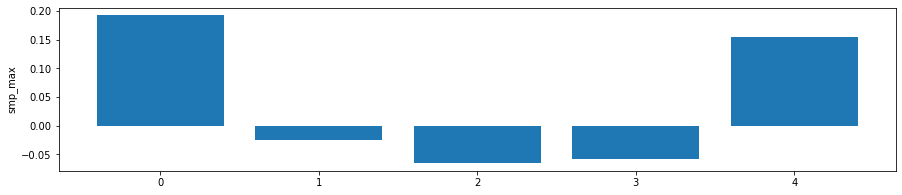

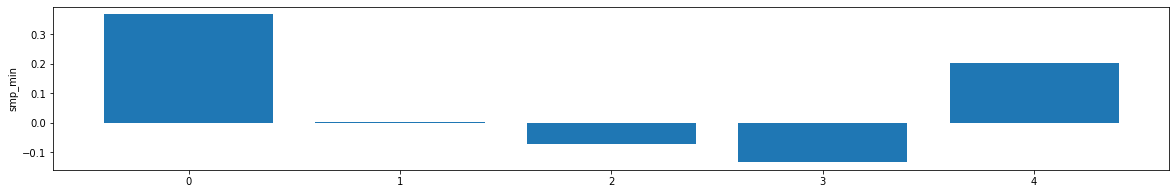

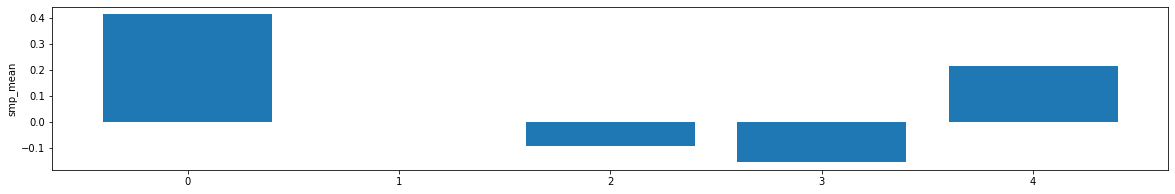

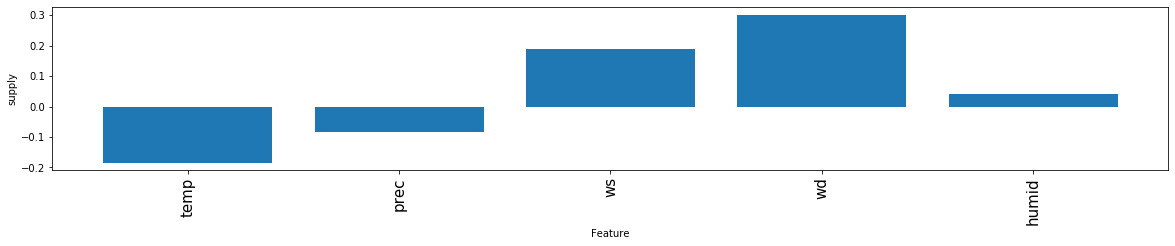

산천단 =================================================================================


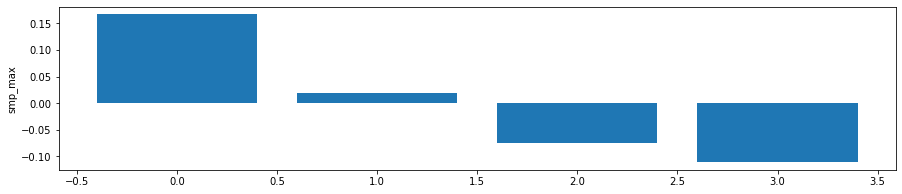

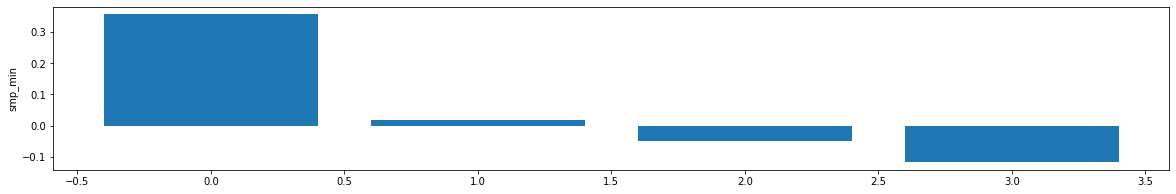

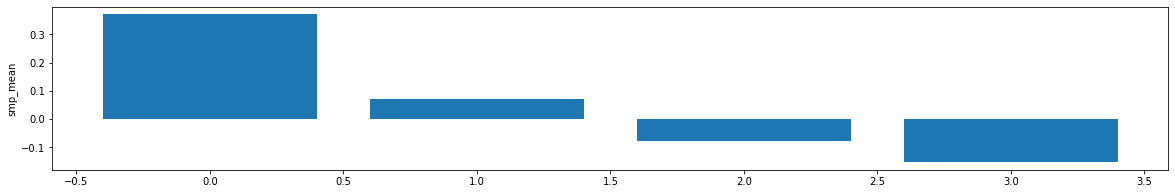

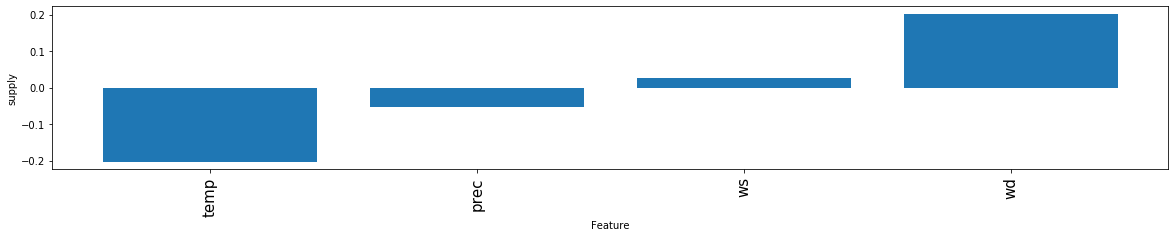

대흘 =================================================================================


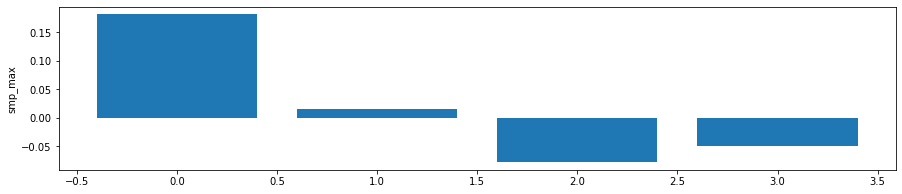

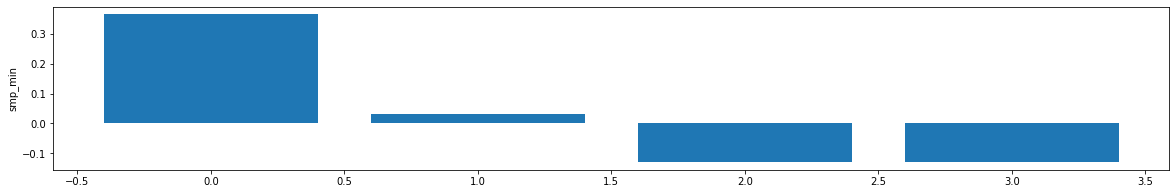

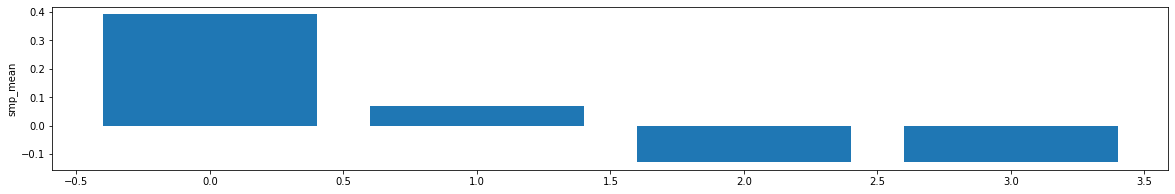

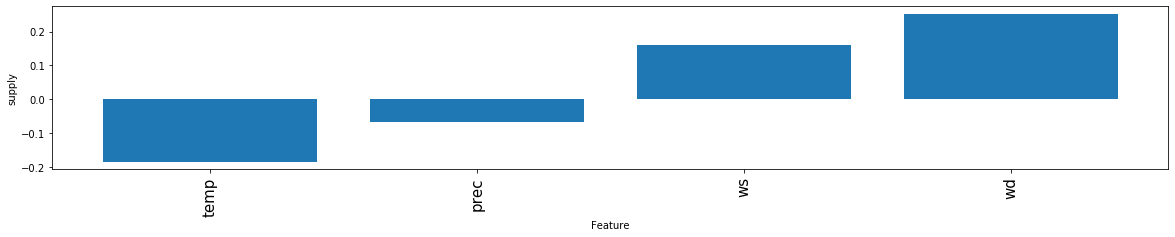

추자도 =================================================================================


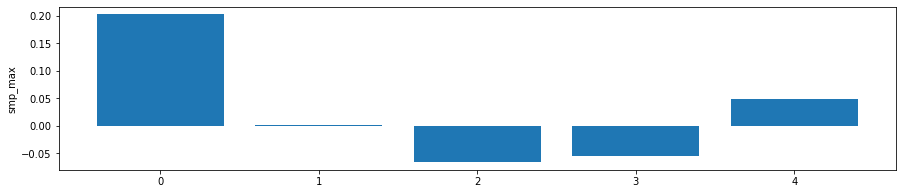

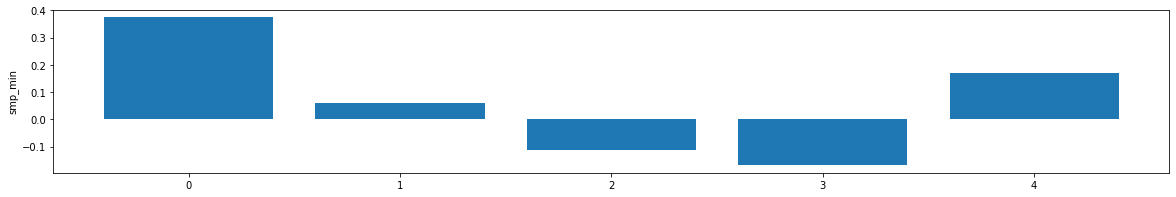

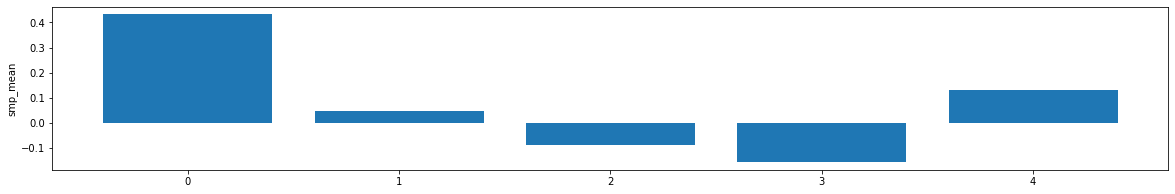

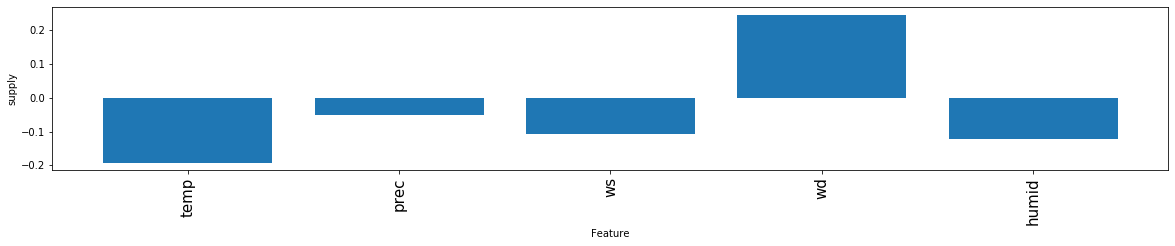

우도 =================================================================================


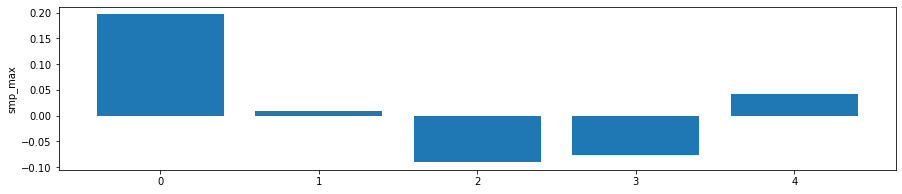

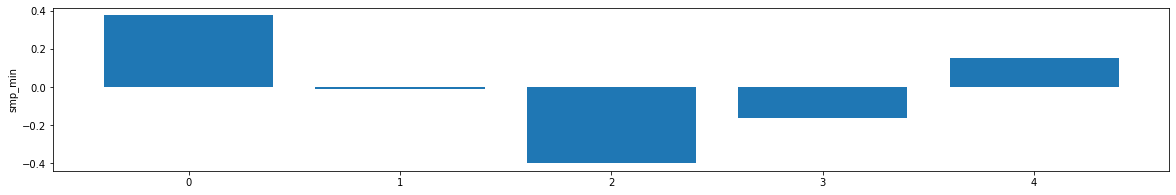

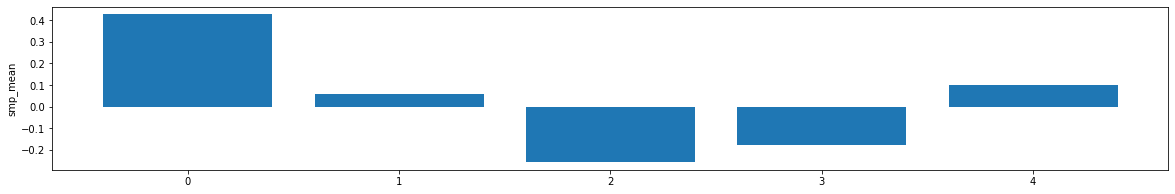

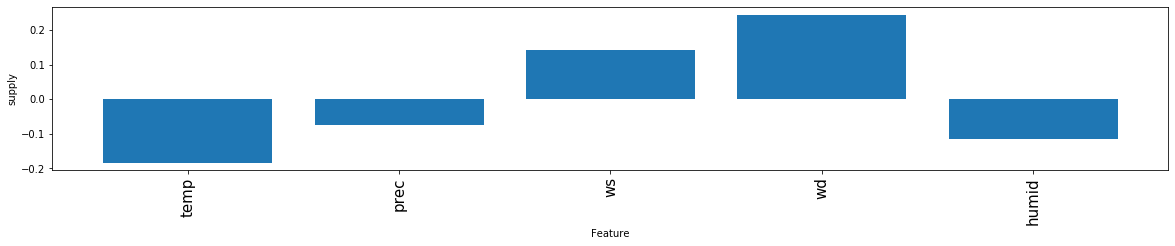

마라도 =================================================================================


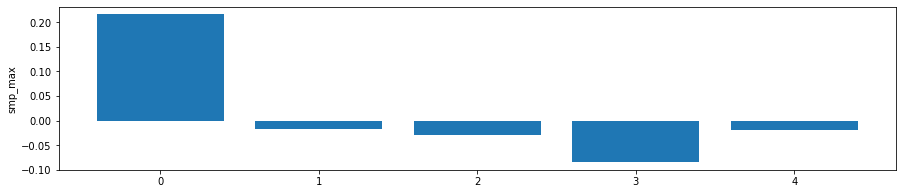

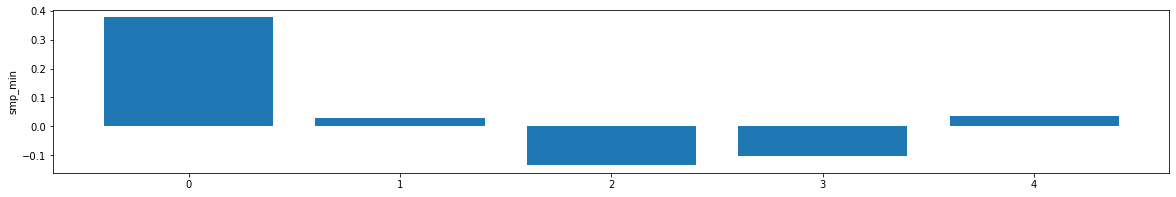

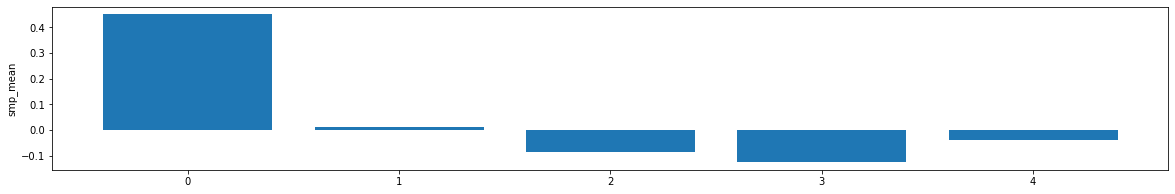

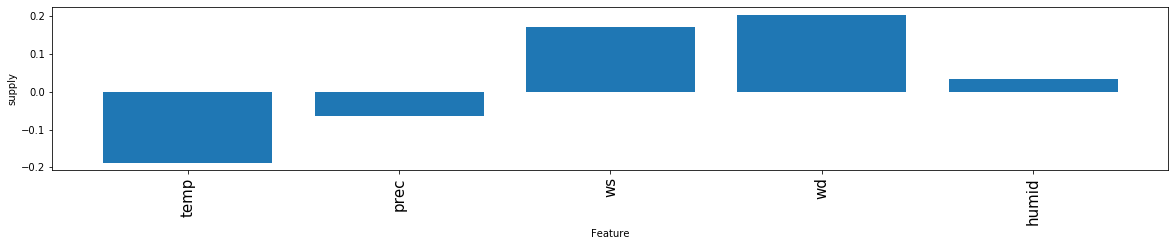

유수암 =================================================================================


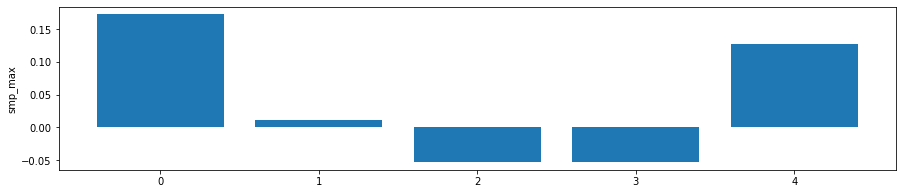

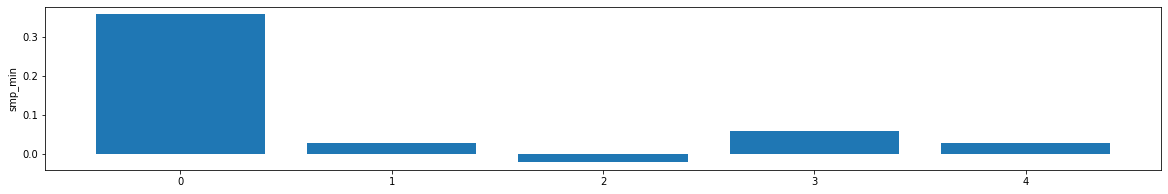

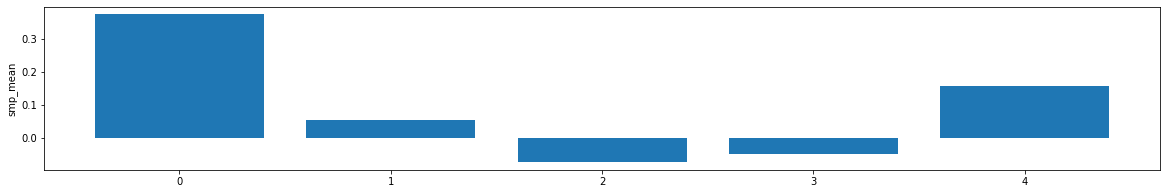

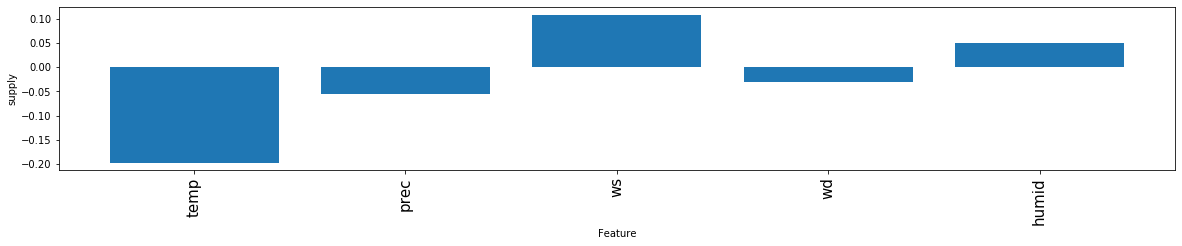

선흘 =================================================================================


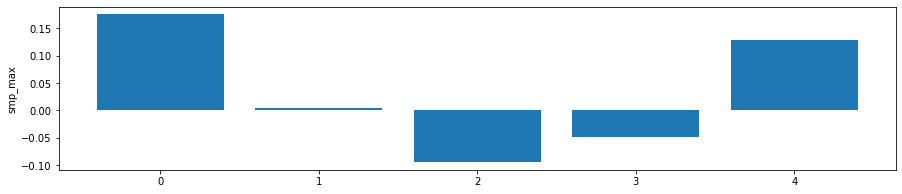

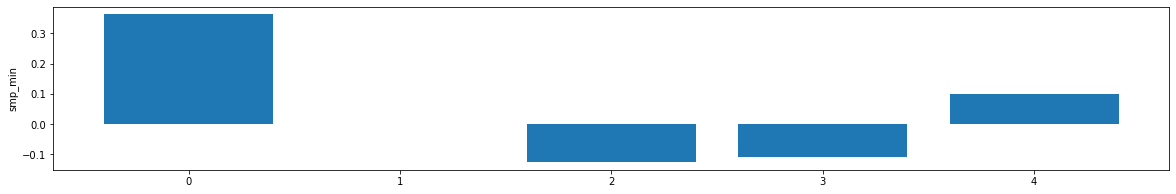

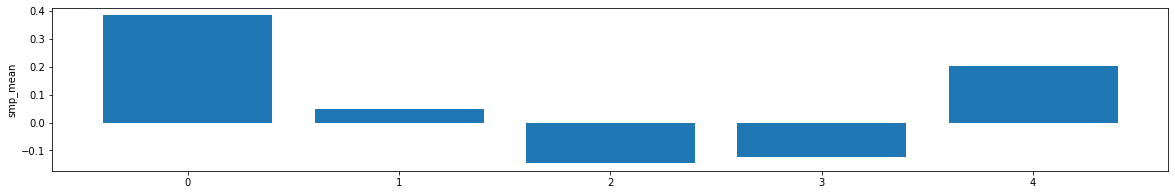

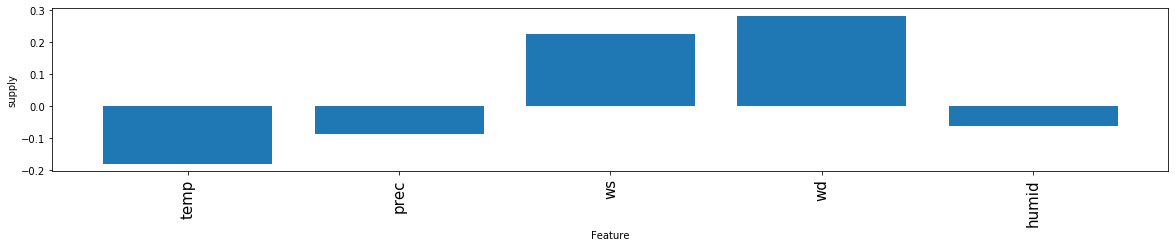

서광 =================================================================================


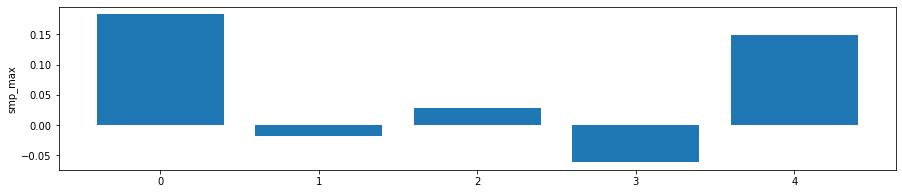

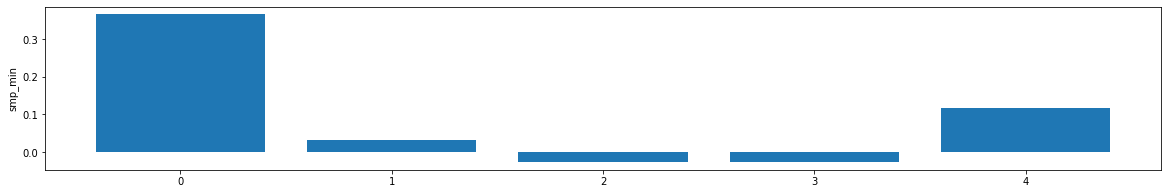

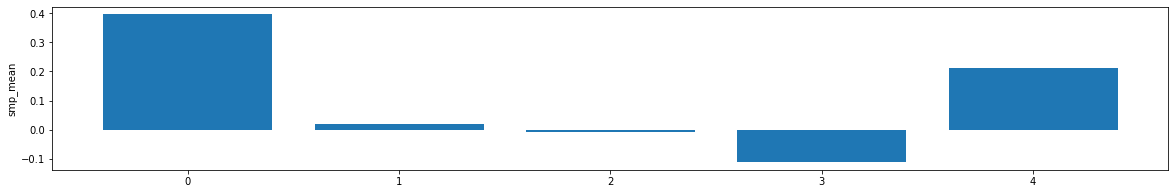

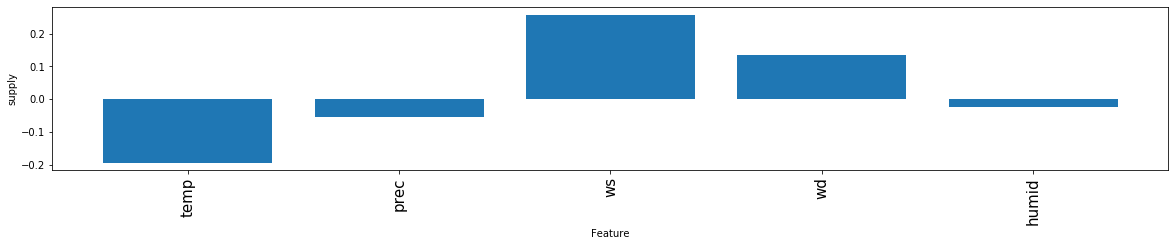

어리목 =================================================================================


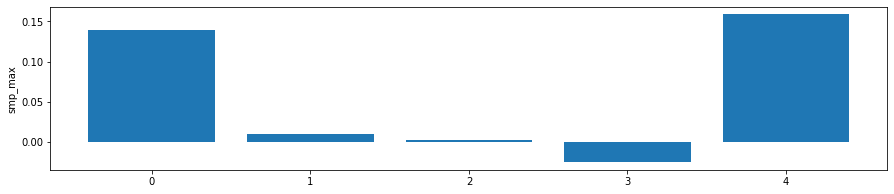

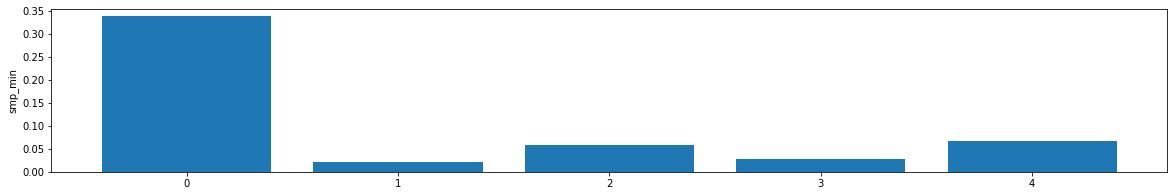

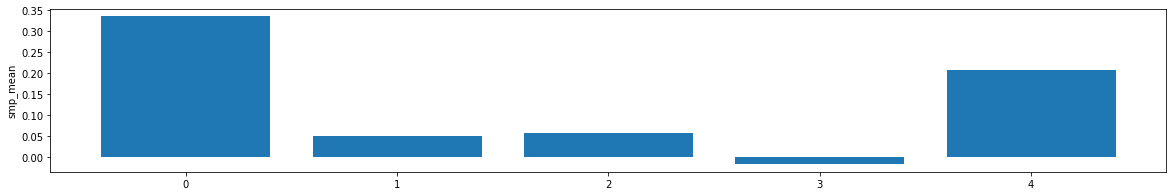

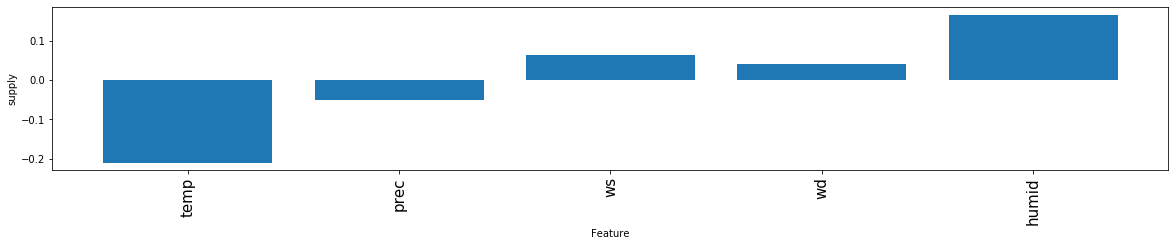

한림 =================================================================================


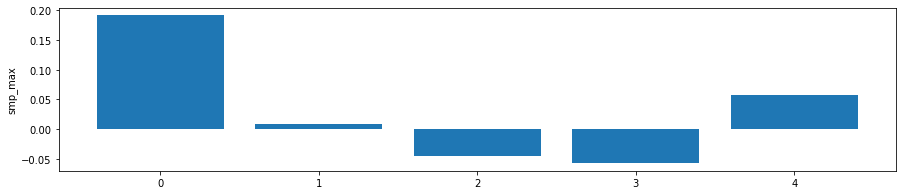

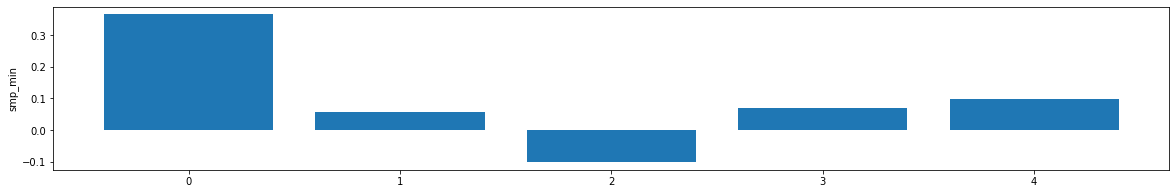

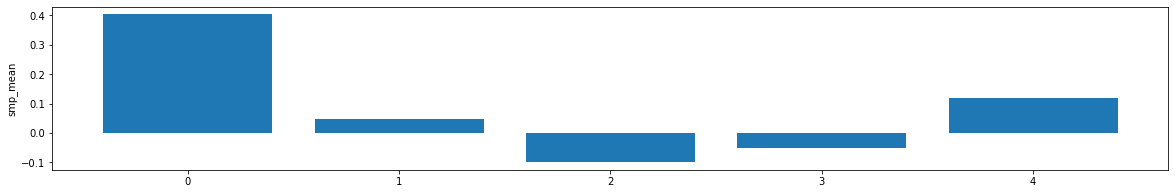

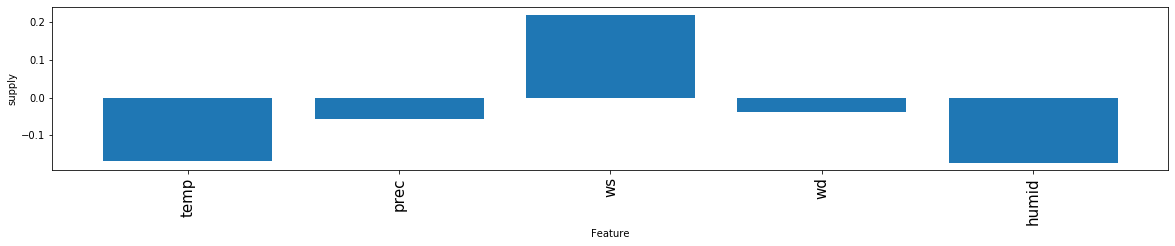

제주남원 =================================================================================


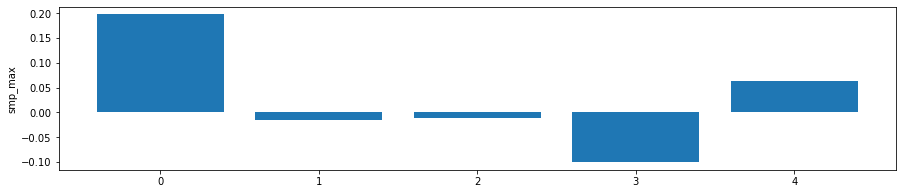

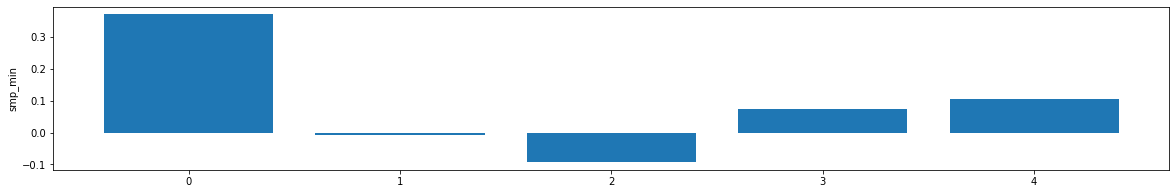

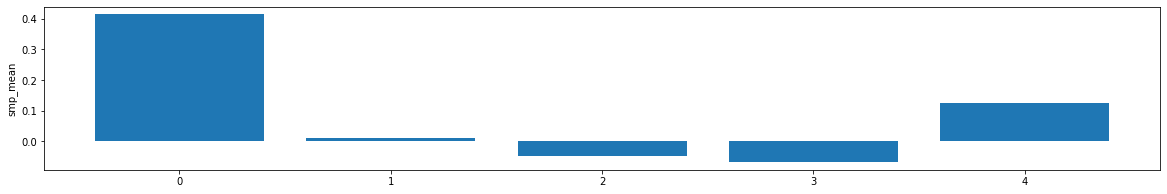

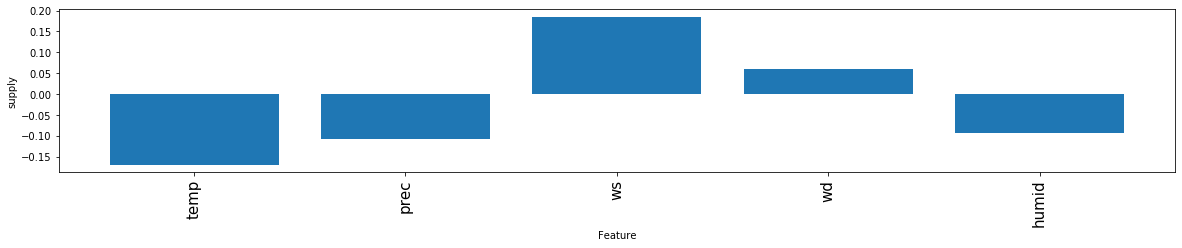

구좌 =================================================================================


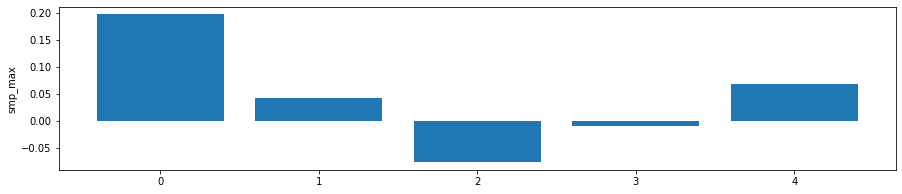

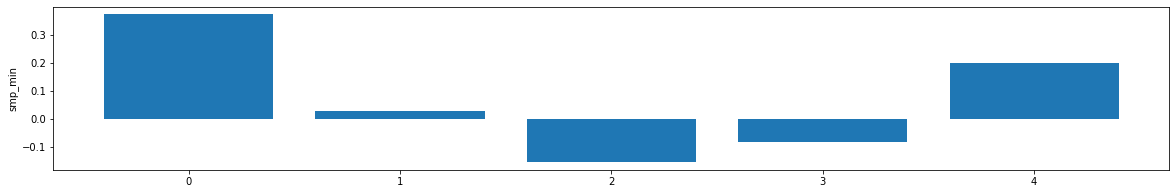

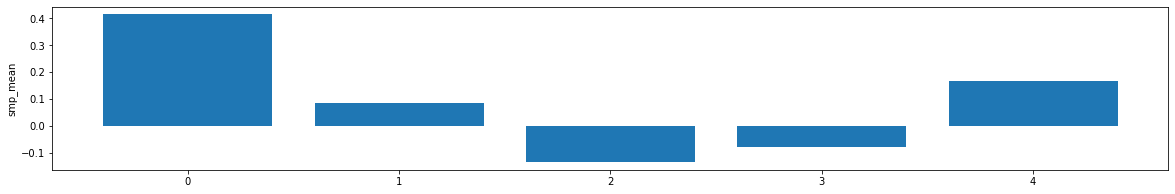

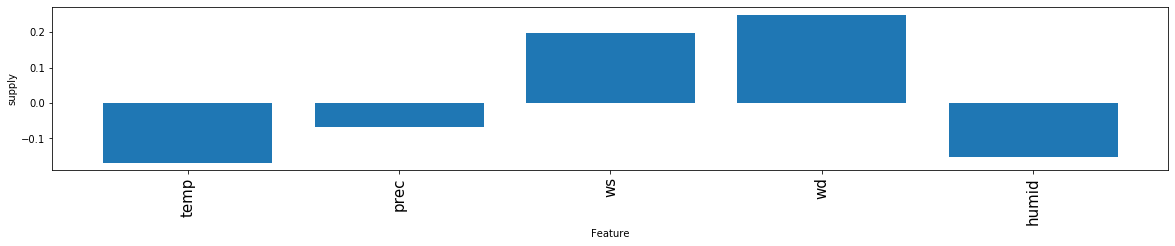

성판악 =================================================================================


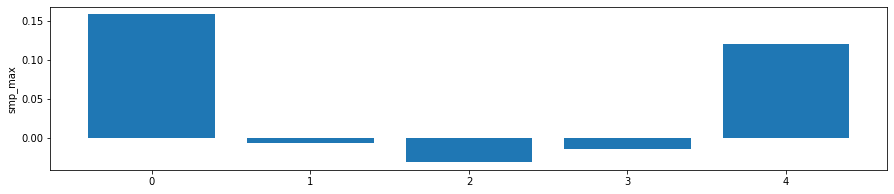

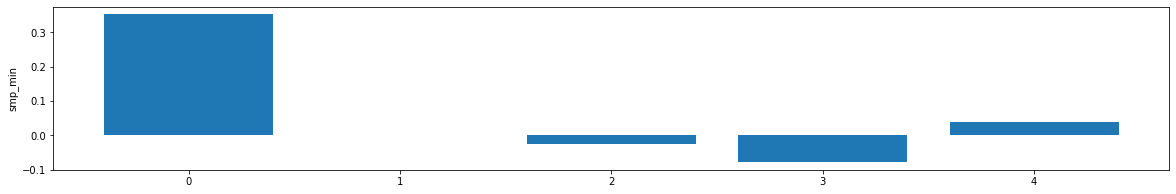

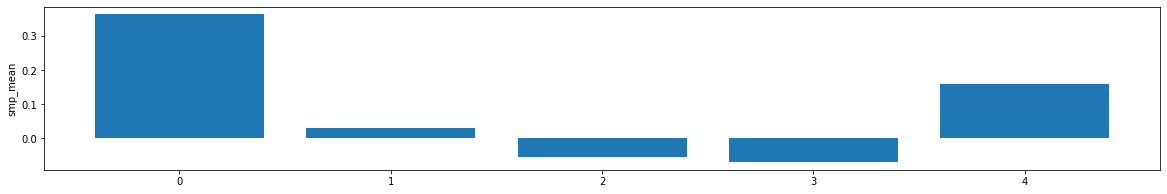

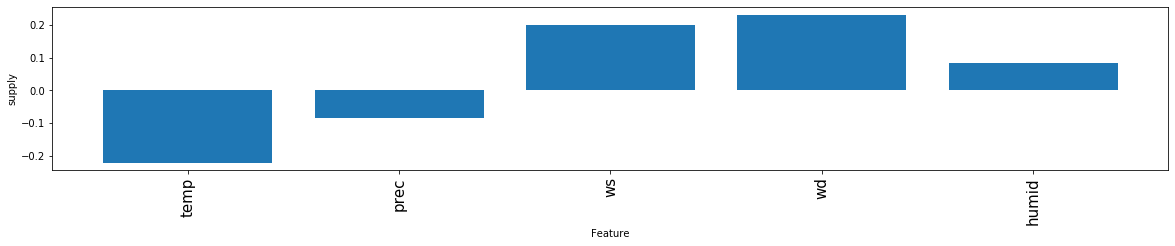

표선 =================================================================================


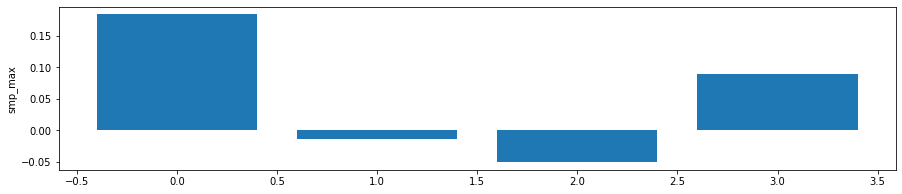

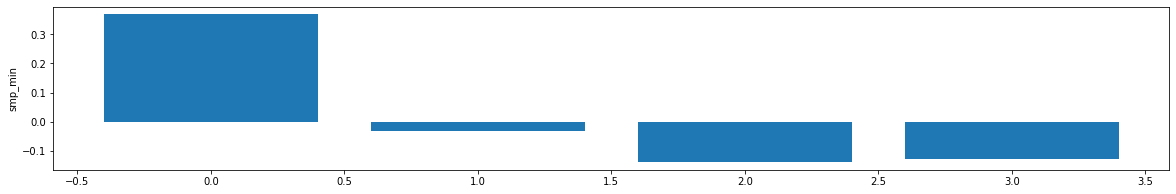

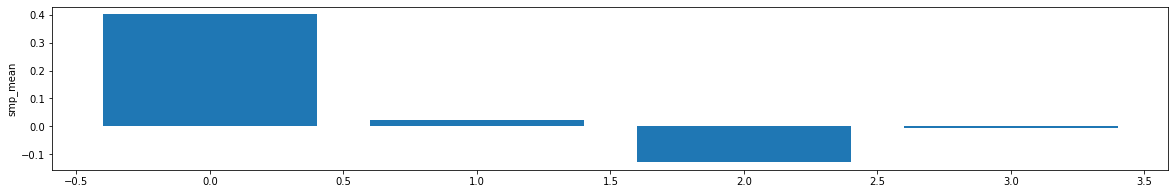

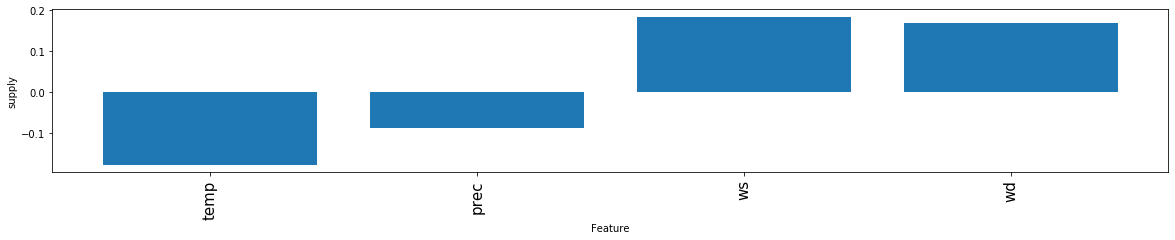

대정 =================================================================================


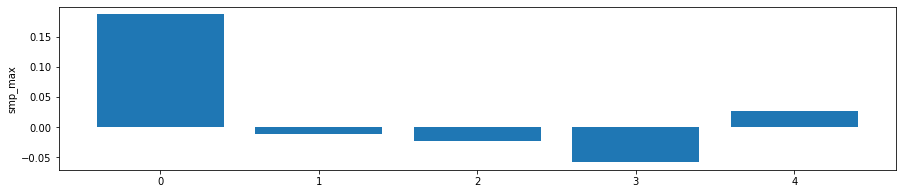

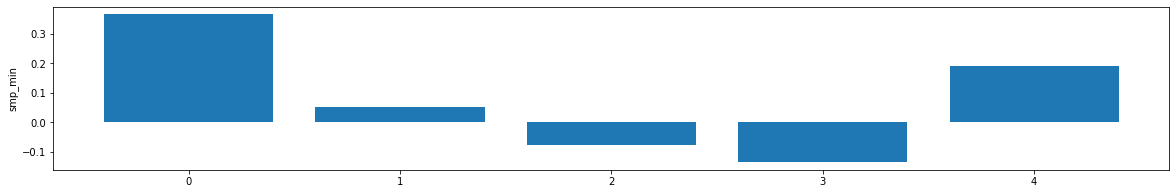

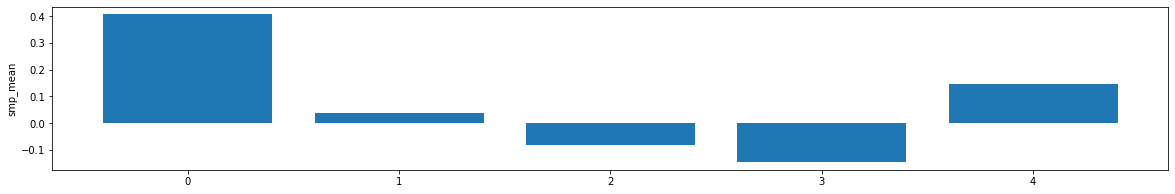

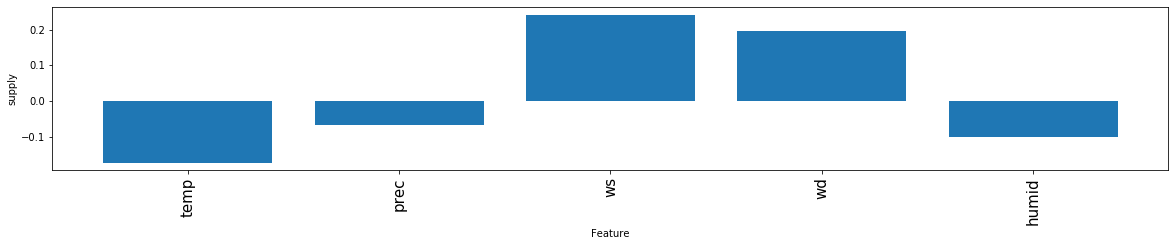

가파도 =================================================================================


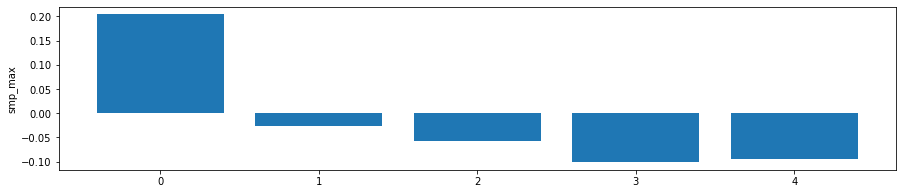

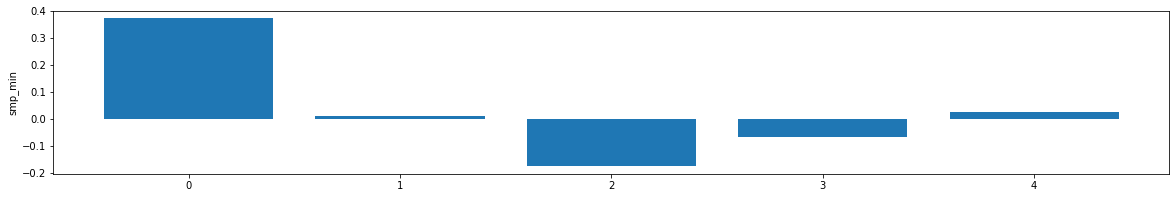

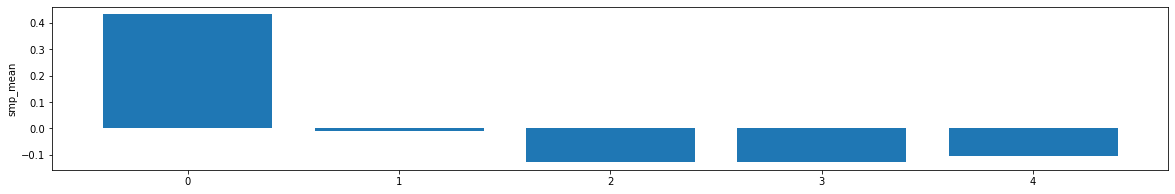

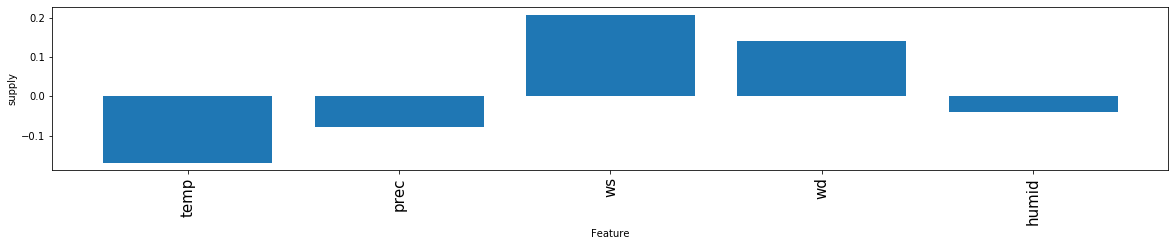

월정 =================================================================================


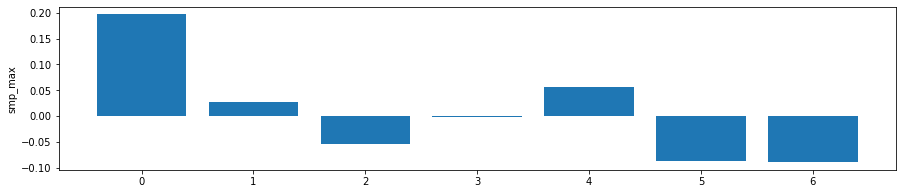

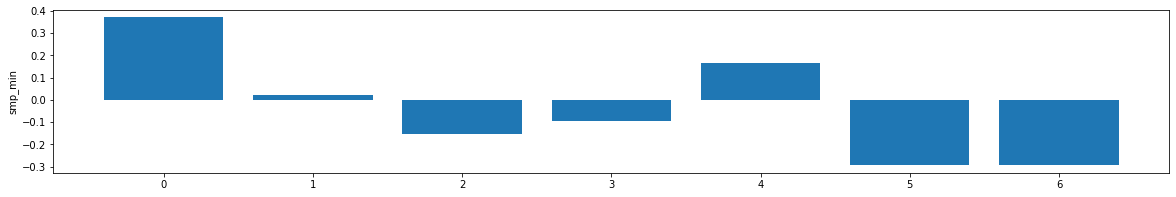

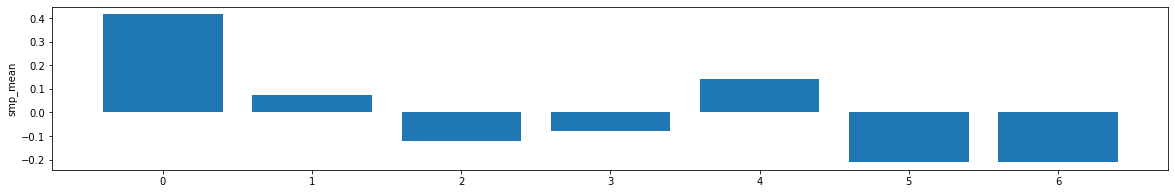

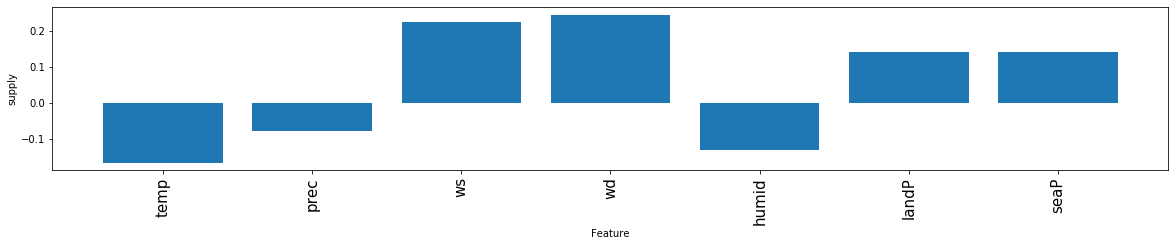

송당 =================================================================================


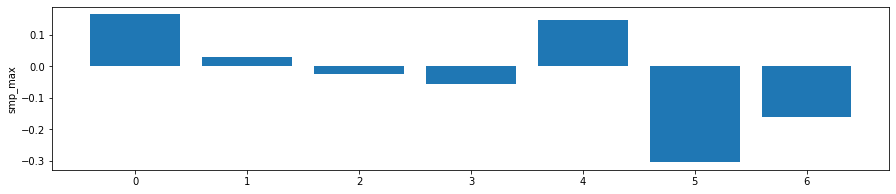

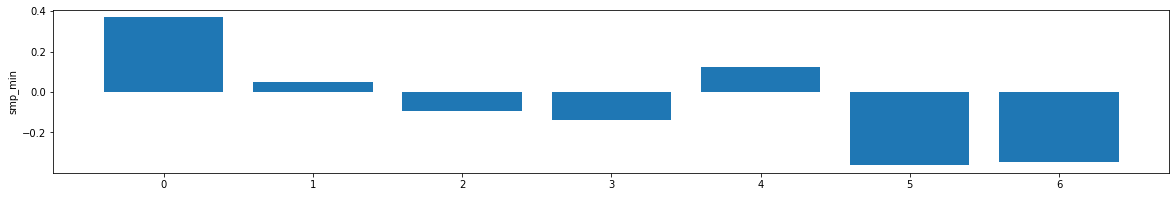

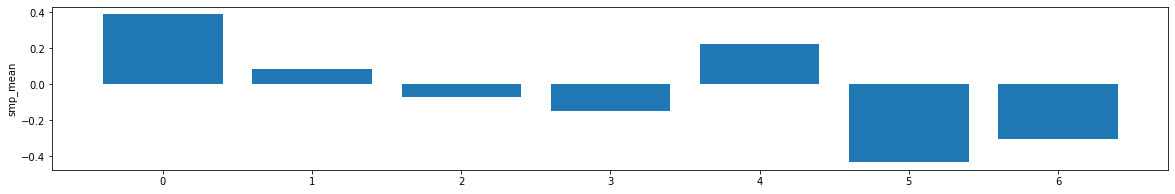

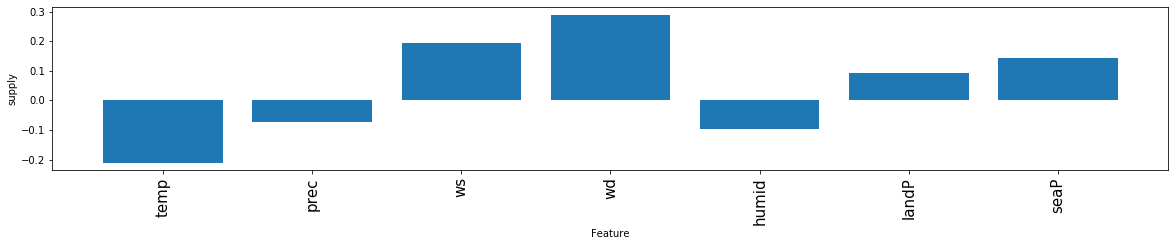

외도 =================================================================================


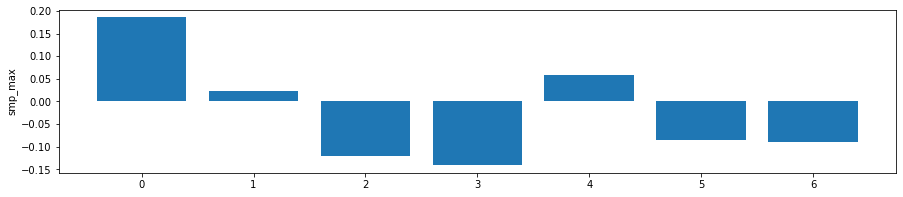

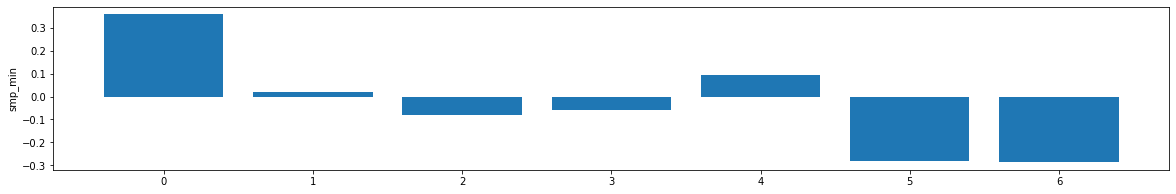

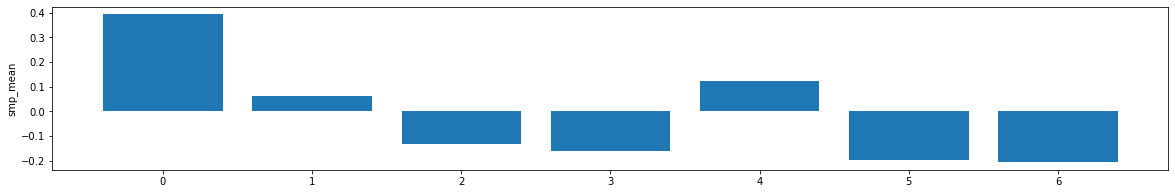

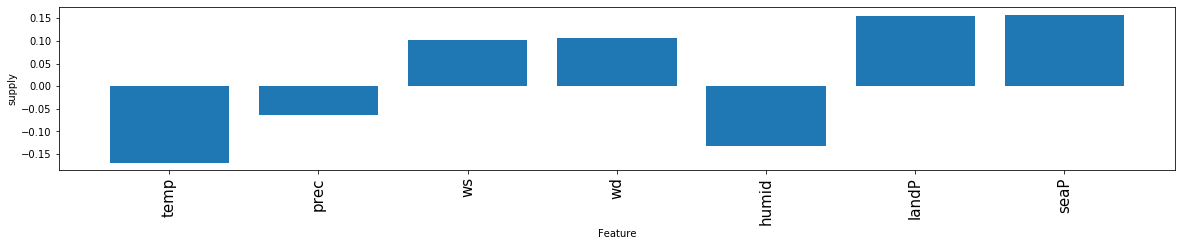

오등 =================================================================================


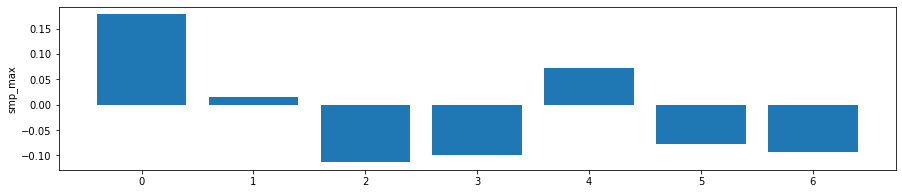

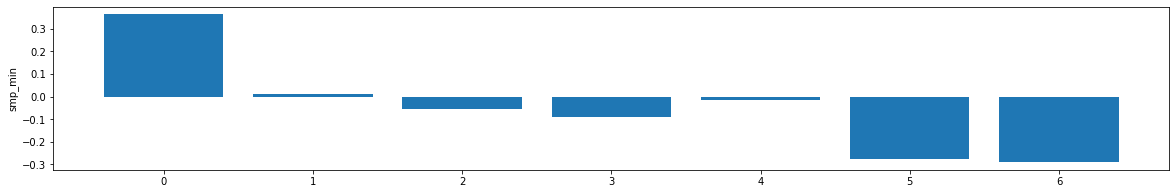

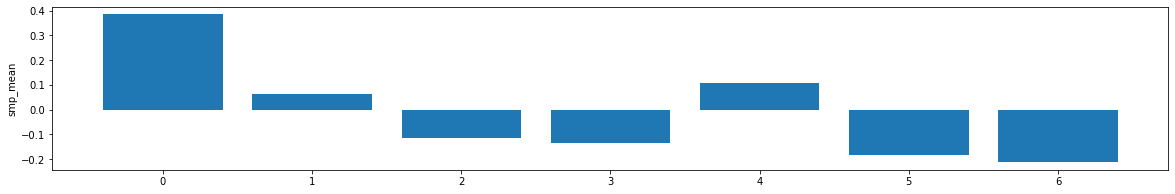

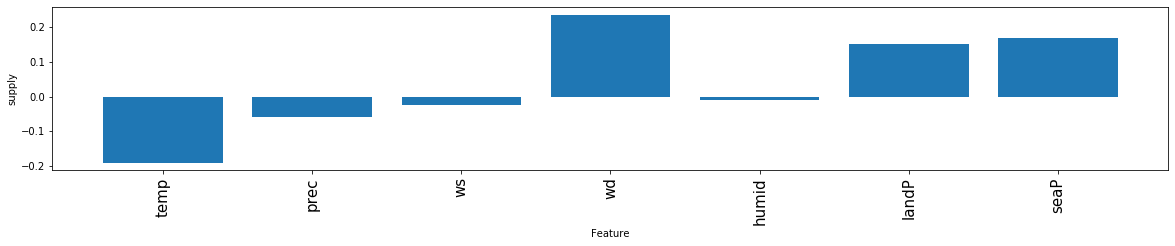

한라생태숲 =================================================================================


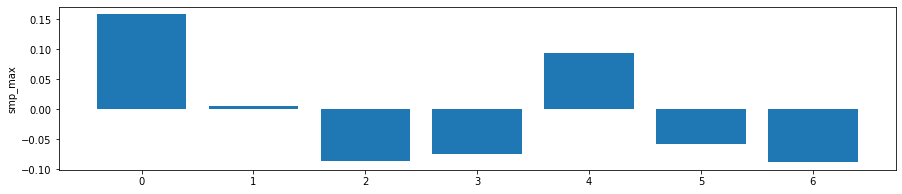

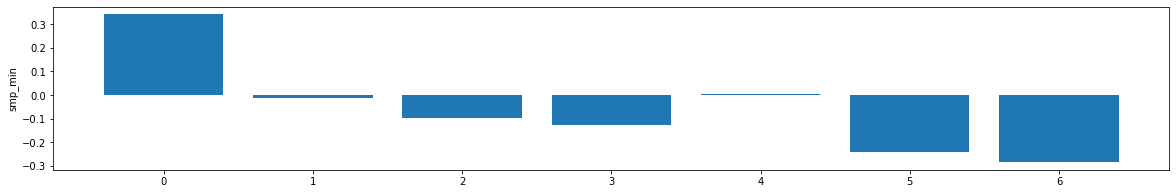

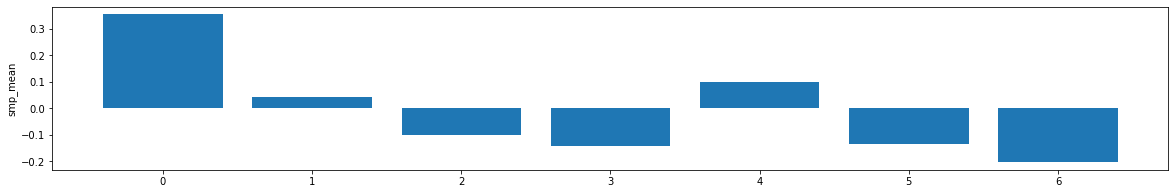

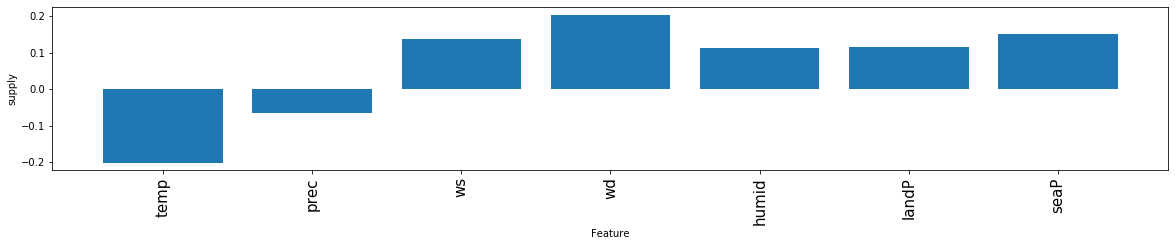

삼각봉 =================================================================================


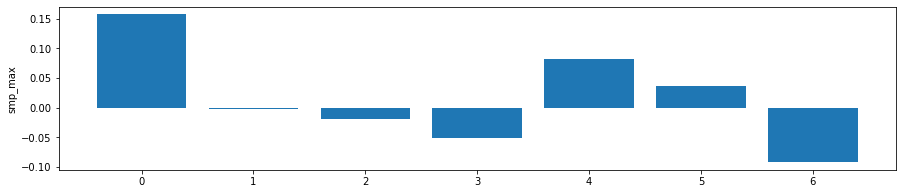

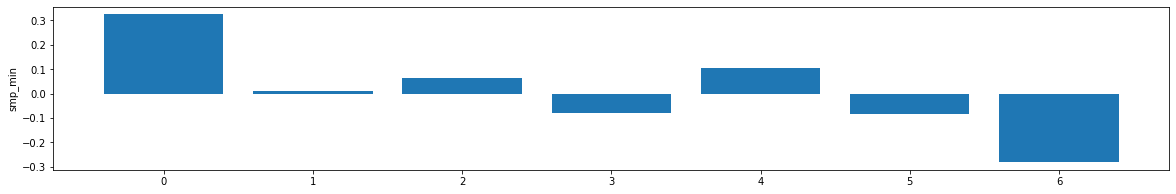

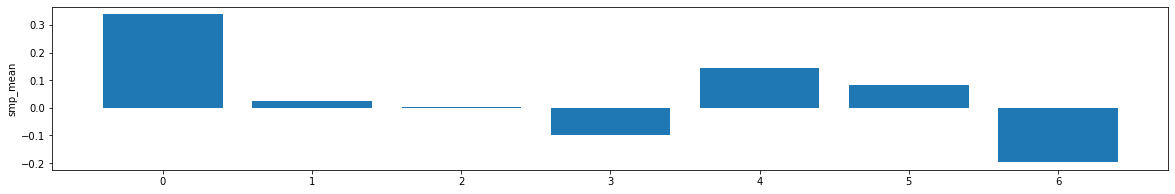

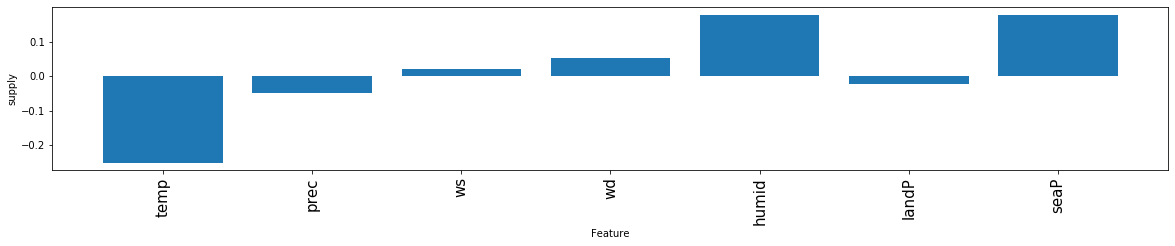

사제비 =================================================================================


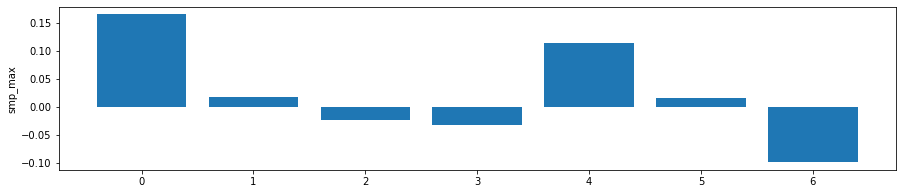

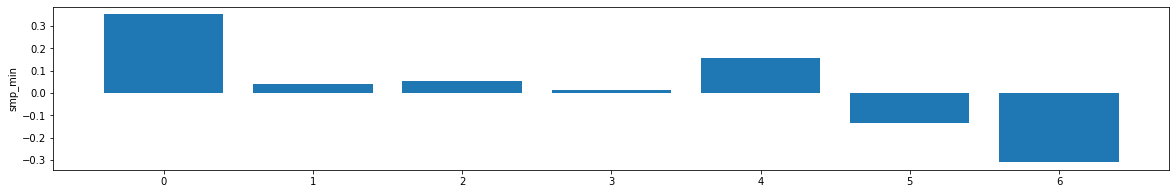

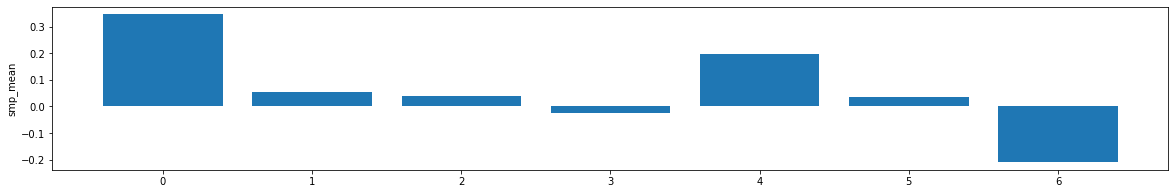

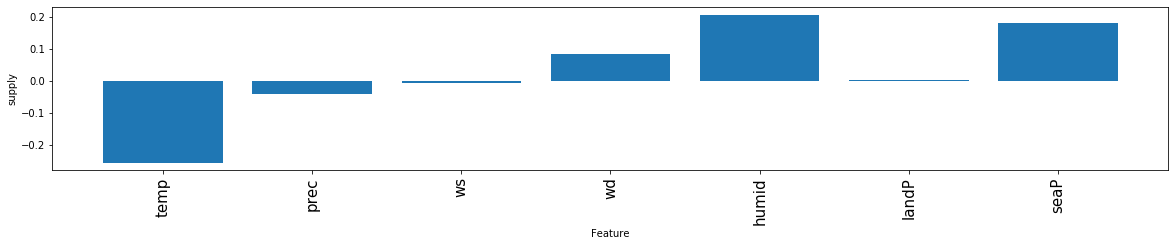

영실 =================================================================================


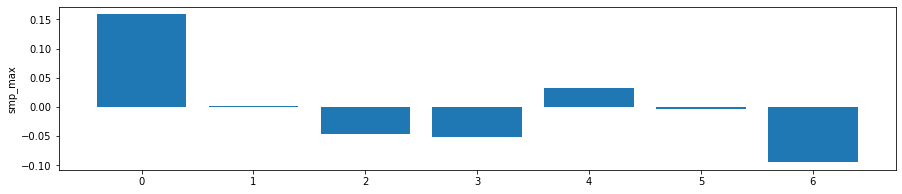

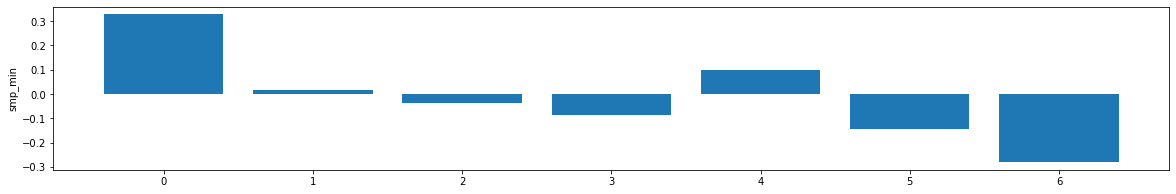

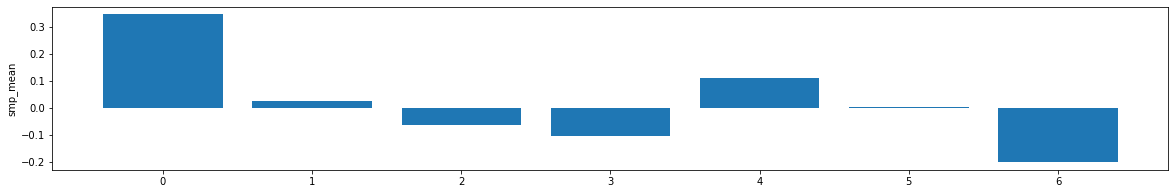

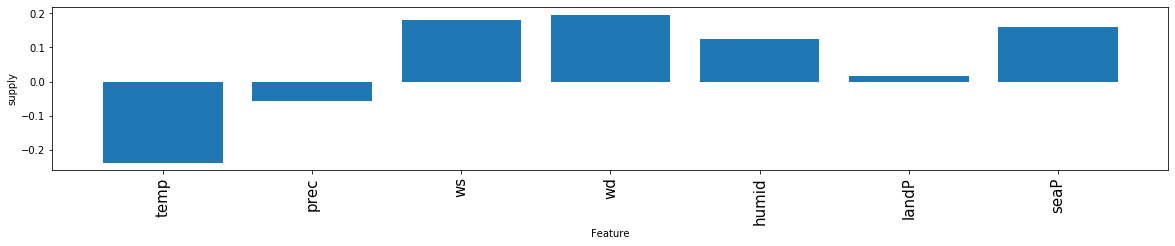

진달래밭 =================================================================================


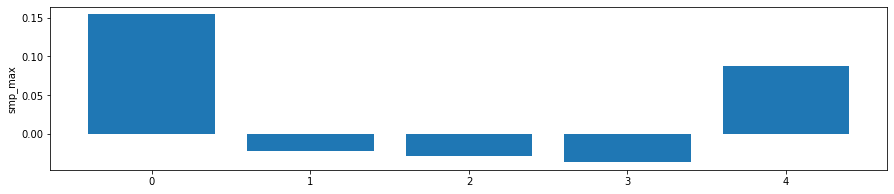

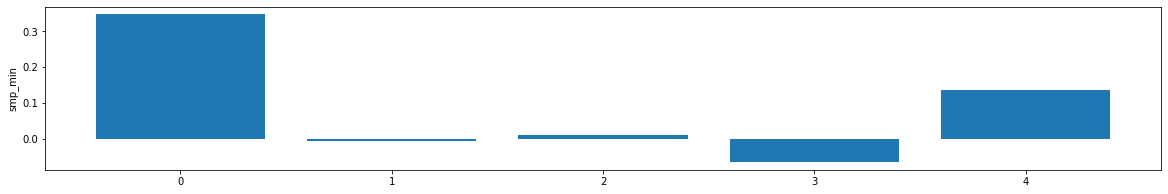

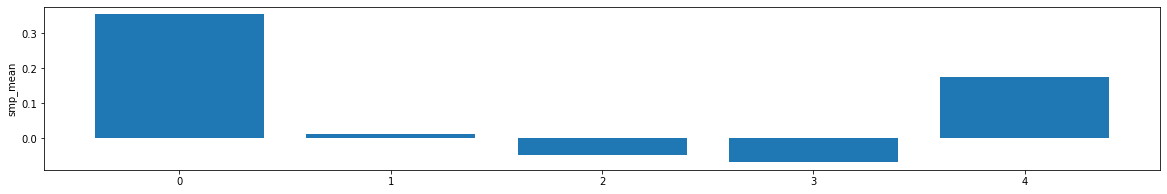

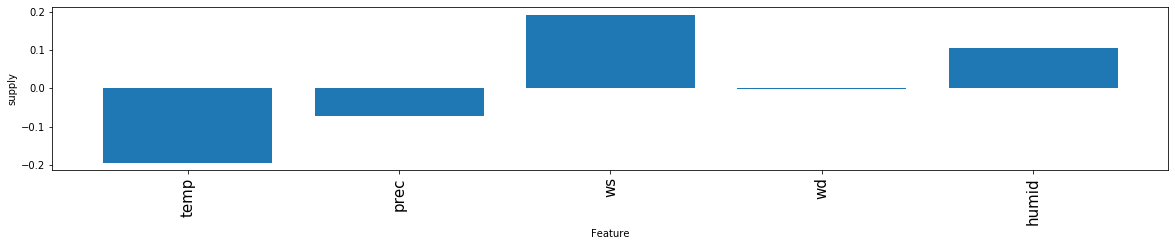

윗세오름 =================================================================================


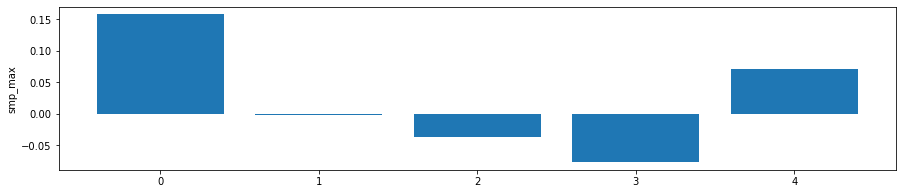

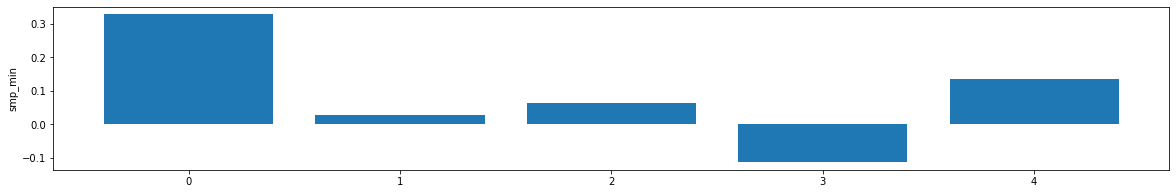

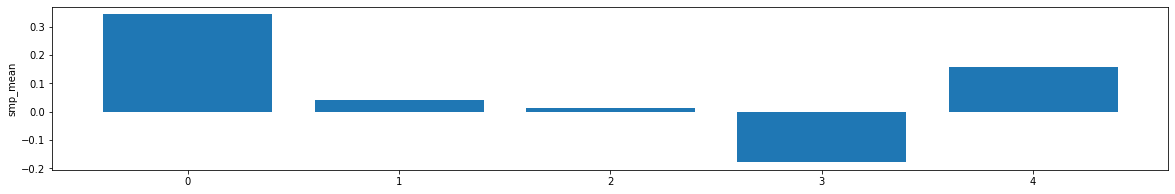

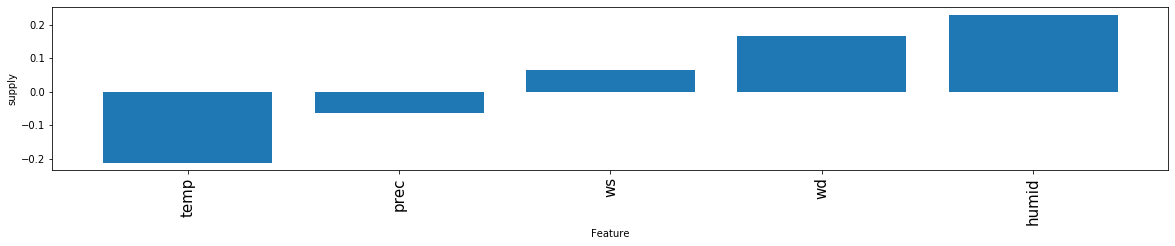

금악 =================================================================================


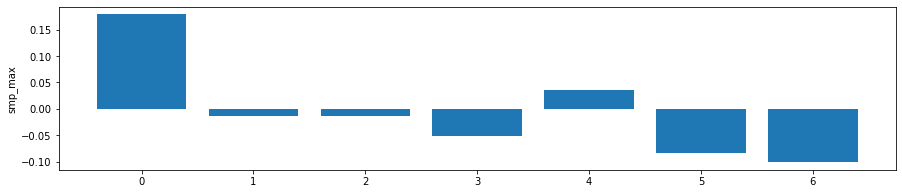

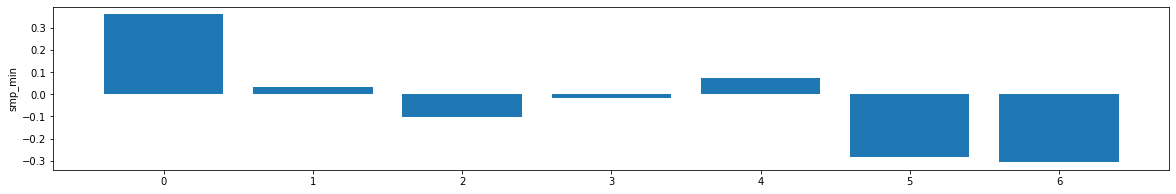

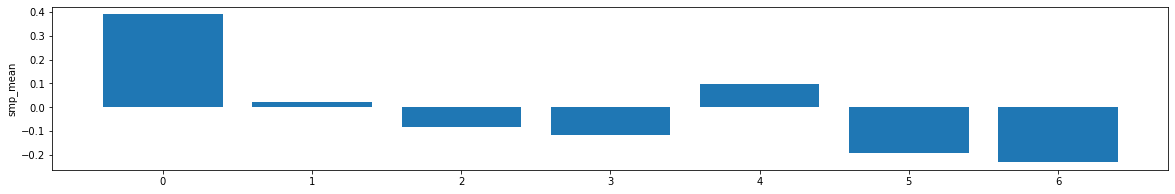

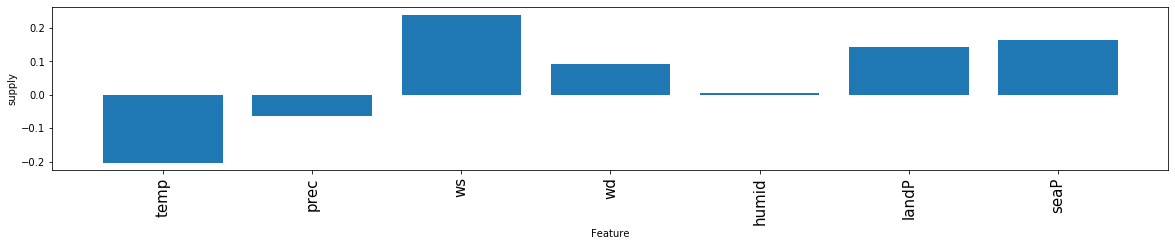

새별오름 =================================================================================


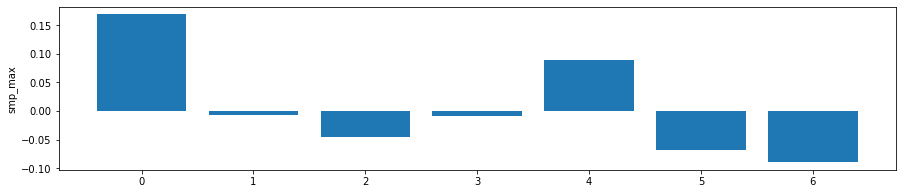

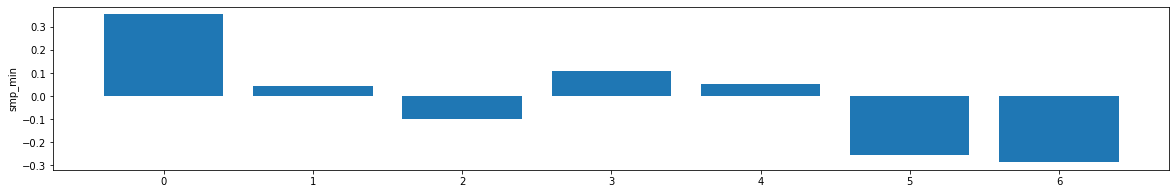

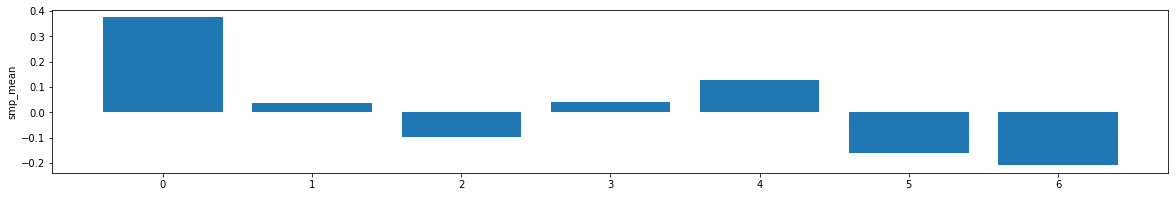

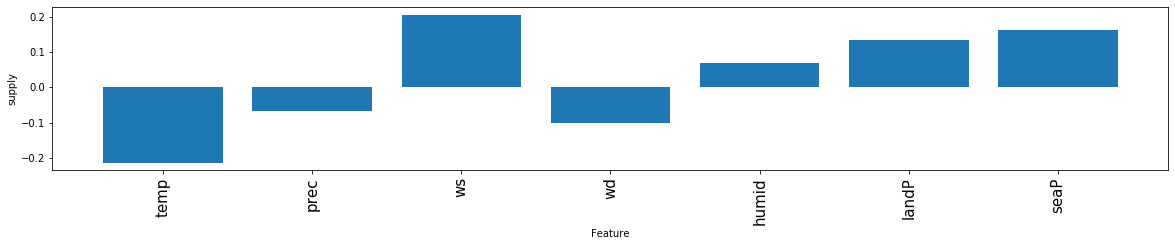

기상(과) =================================================================================


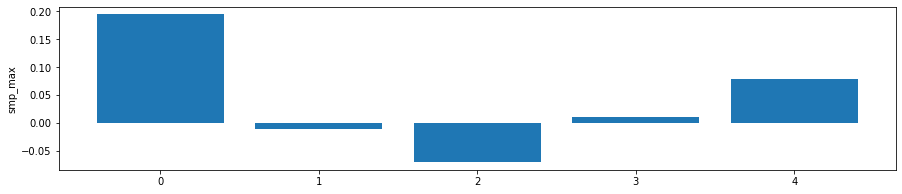

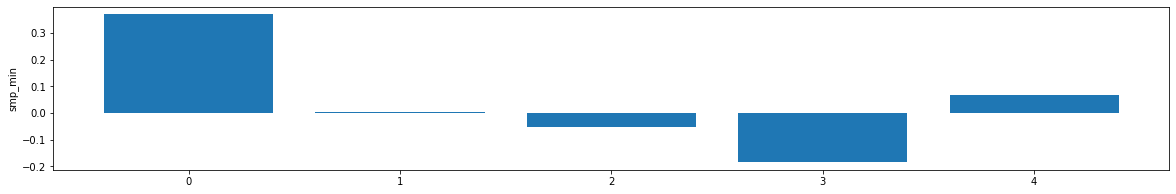

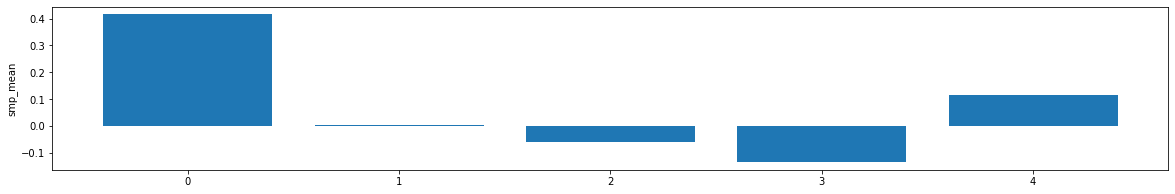

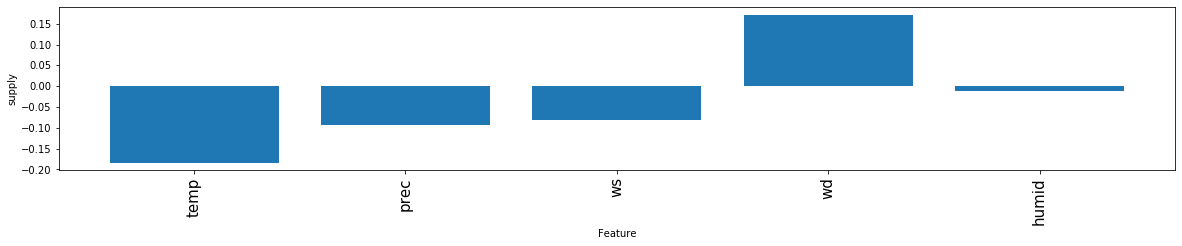

태풍센터 =================================================================================


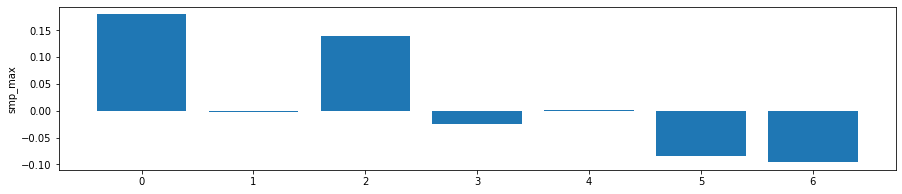

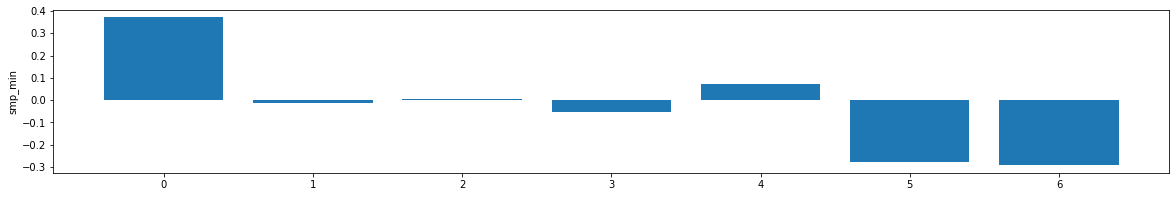

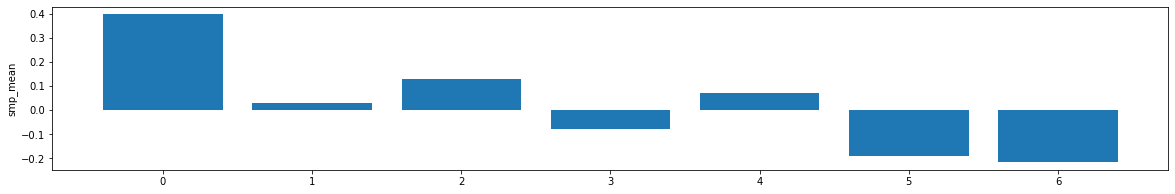

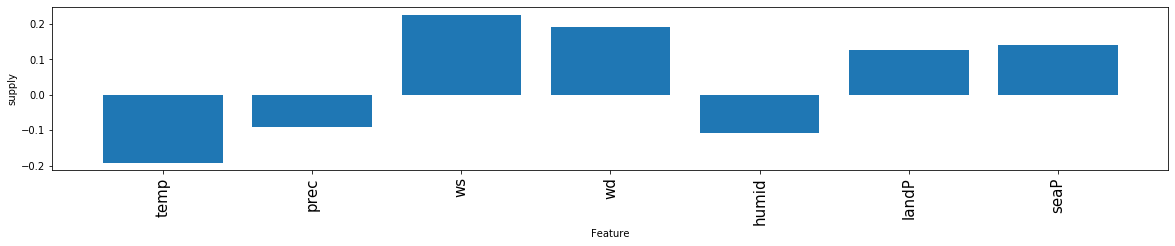

신례 =================================================================================


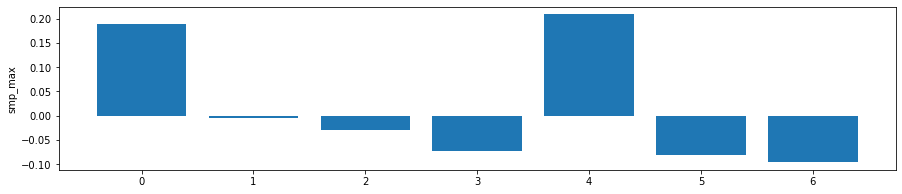

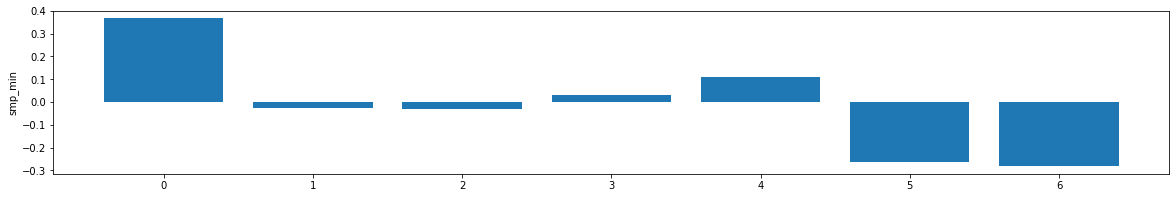

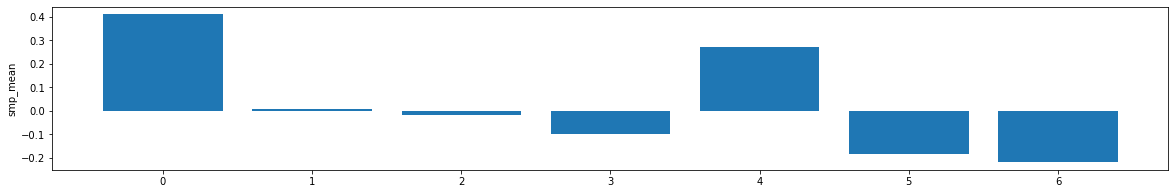

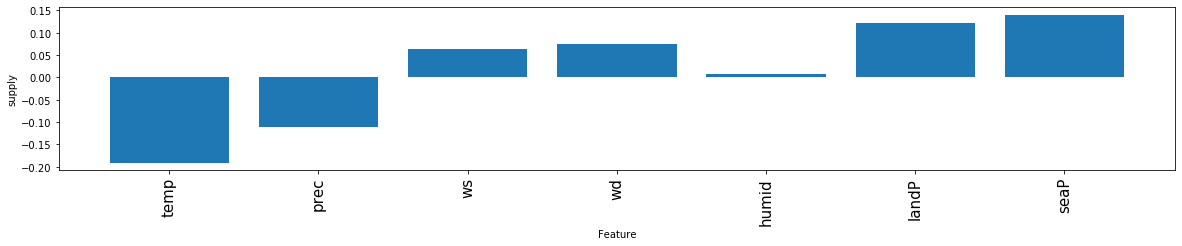

In [158]:
for i in range(len(area)):
    print(area['name'].iloc[i],'======================================================================================================')
    corr_bar(area['area'].iloc[i])